# Análisis de Componentes Principales (PCA)

## Análisis de las variables sin normalizar (Boxplot)

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import Utils

COLORS = ["#003049", "#d62828", "#f77f00", "#fcbf49", "#eae2b7", "#007F83", "#BC3C28", "#FFD56B", "#006A4E"]

DATASET_PATH = "../resources/europe.csv"

dataset = pd.read_csv(DATASET_PATH)



In [55]:
def show_boxplot(dataset):
    
    fig, ax = plt.subplots()

    boxplot = ax.boxplot(dataset.select_dtypes(include='number').values, patch_artist=True)

    for patch, color in zip(boxplot['boxes'], COLORS):
        patch.set_facecolor(color)

    ax.set_xticklabels(dataset.columns[1:], rotation=45, ha="right")

    plt.tight_layout()

    plt.show()

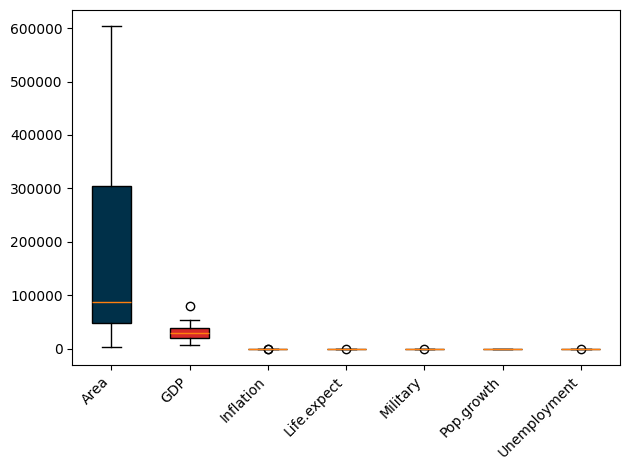

In [56]:

show_boxplot(dataset)

Como se puede apreciar, al no estar los datos estandarizados, la variable Area de los países es la predominante y por su magnitud no deja ver las demás variables.

Se aplica el z-score para estandarizarlos, y se obtiene lo siguiente:

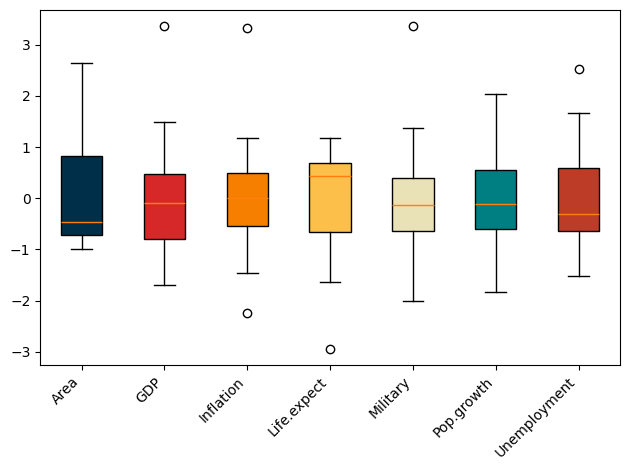

In [59]:
standarizedDataset = Utils.zScoreData(dataset)
show_boxplot(standarizedDataset)

Para realizar el análisis de componentes principales, se calcula la matriz de correlaciones en lugar de la matriz de covarianzas, proque los datos ya están estandarizados:

In [64]:
Sx = np.corrcoef(standarizedDataset.select_dtypes(include='number').values, rowvar=False)
print(Sx)

[[ 1.         -0.13851689  0.32008964 -0.02167065  0.10169131 -0.08862071
   0.02544918]
 [-0.13851689  1.         -0.49275512  0.70097781 -0.28446264  0.76042363
  -0.52775598]
 [ 0.32008964 -0.49275512  1.         -0.67919262  0.04828252 -0.47874553
   0.19877418]
 [-0.02167065  0.70097781 -0.67919262  1.         -0.06324906  0.77162899
  -0.24597534]
 [ 0.10169131 -0.28446264  0.04828252 -0.06324906  1.         -0.28234749
   0.29227872]
 [-0.08862071  0.76042363 -0.47874553  0.77162899 -0.28234749  1.
  -0.17476925]
 [ 0.02544918 -0.52775598  0.19877418 -0.24597534  0.29227872 -0.17476925
   1.        ]]


A partir de esta matriz, se calculan los autovalores ordenados descendentemente:

In [103]:
evalues, evectors = np.linalg.eig(Sx) 
indices = np.argsort(np.abs(evalues))[::-1]
sortedEvalues = evalues[indices]
print(sortedEvalues)


[3.22716568 1.18712341 1.06319053 0.77035598 0.45784862 0.16867389
 0.12564189]


La primer componente será entonces la combinación lineal de los componentes del autovector asociado al mayor autovalor, es decir a λ=3.22716568.
El autovector en cuestión es:

In [105]:
sortedEvectors = evectors[:, indices]
print(sortedEvectors[0])

[-0.1248739   0.1728722   0.89829674  0.0448504  -0.32401693  0.19011808
 -0.06664282]


El componente principal PC1 será entonces combinación lineal de estos valores:

PC1 = -0.1248739 * Area + 0.1728722 * GDP + 0.89829674 * Inflation + 0.0448504 * Life.expect + -0.32401693 * Military + 0.19011808 * Pop.growth + -0.06664282 * Unemployment

## Interpretación de PC1

Como se puede observar, en PC1 la variable que más influye por diferencia es la inflación, seguida por el poder militar de manera inversa. Es decir, una alta inflación hace aumentar PC1 mientras que un alto poder militar lo hace bajar. En menor medida, también influyen el crecimiento poblacional y el GPD del país.

### PC1 y PC2 por país

In [111]:
countries = dataset['Country']
countryData = dataset.select_dtypes(include='number').values
PCsDataset = pd.DataFrame({
    'Country': countries,
    'PC1': np.dot(countryData, sortedEvectors[0]),
    'PC2': np.dot(countryData, sortedEvectors[1]),
})
print(PCsDataset)


           Country           PC1            PC2
0          Austria  -3275.620811   47387.294034
1          Belgium   2728.245474   20195.708336
2         Bulgaria -11454.806690   57289.965934
3          Croatia  -3951.910797   30669.841293
4   Czech Republic  -5159.379864   42997.561426
5          Denmark   1020.221963   26380.645652
6          Estonia  -2115.016990   25291.279853
7          Finland -35996.714869  173926.089476
8          Germany -37991.380911  183646.215654
9           Greece -11927.433360   69470.087152
10         Hungary  -8222.933812   49110.701218
11         Iceland  -6268.720717   56507.300243
12         Ireland  -1717.180165   40481.976003
13           Italy -32351.693702  154789.322110
14          Latvia  -5155.327532   34512.875364
15       Lithuania  -4846.706423   35168.969571
16      Luxembourg  13616.751820   11780.467085
17     Netherlands   2077.964788   26254.413103
18          Norway -31199.046242  169009.856242
19          Poland -35548.442046  159129

## Biplot

Ahora se realiza el Biplot para encontrar relaciones entre los países:

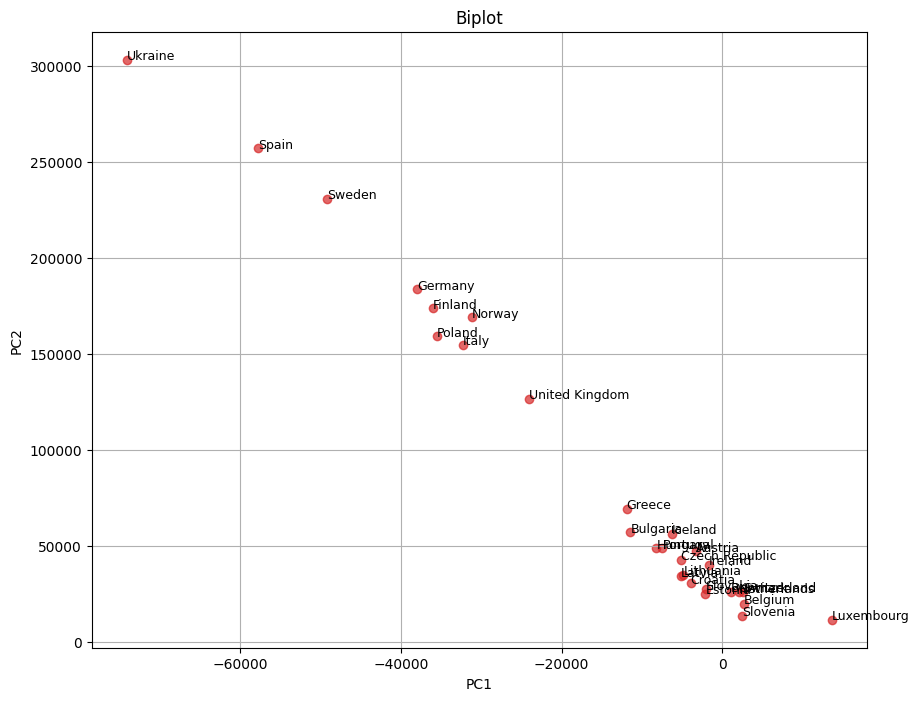

In [121]:
import pandas as pd

plt.figure(figsize=(10, 8))

plt.scatter(PCsDataset['PC1'], PCsDataset['PC2'], alpha=0.7, c=COLORS[1])

for i, country in enumerate(PCsDataset['Country']):
    plt.annotate(country, (PCsDataset['PC1'][i], PCsDataset['PC2'][i]), fontsize=9)

#TODO: Add vectors for every feature using eignvalues and eignvectors

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Biplot')

plt.grid(True)

plt.show()